## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## First, I'll compute the camera calibration using chessboard images

In [25]:
%matplotlib inline
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#%matplotlib qt
%pylab inline
import pickle
from ipywidgets import widgets
from ipywidgets import interact

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)

objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')

test_image0= cv2.imread('camera_cal/calibration1.jpg')

test_image1= cv2.imread('test_images/test1.jpg')
# I do this conversion in order to return all images to RGB. This conversion removes all my RGB2GRAY comfusions
test_image1=cv2.cvtColor(np.copy(test_image1),cv2.COLOR_BGR2RGB)  
test_image2= cv2.imread('test_images/test2.jpg')
test_image2=cv2.cvtColor(np.copy(test_image2),cv2.COLOR_BGR2RGB)
test_image3= cv2.imread('test_images/test3.jpg')
test_image3=cv2.cvtColor(np.copy(test_image3),cv2.COLOR_BGR2RGB)
test_image4= cv2.imread('test_images/test4.jpg')
test_image4=cv2.cvtColor(np.copy(test_image4),cv2.COLOR_BGR2RGB)
test_image5= cv2.imread('test_images/test5.jpg')
test_image5=cv2.cvtColor(np.copy(test_image5),cv2.COLOR_BGR2RGB)
test_image6= cv2.imread('test_images/test6.jpg')
test_image6=cv2.cvtColor(np.copy(test_image6),cv2.COLOR_BGR2RGB)
test_image7= cv2.imread('test_images/straight_lines1.jpg')
test_image7=cv2.cvtColor(np.copy(test_image7),cv2.COLOR_BGR2RGB)
test_image8= cv2.imread('test_images/straight_lines1.jpg')
test_image8=cv2.cvtColor(np.copy(test_image8),cv2.COLOR_BGR2RGB)
test_images=[test_image0,test_image1,test_image2,test_image3,test_image4,test_image5,test_image6,test_image7,test_image8]



#main functions
#this function find the chesspoint od all images in camera_cal directort and
#populate the objpoints and imgpoints list
def find_chessboard_points_in_directory(images_directory):
    # Arrays to store object points and image points from all the images.
    tmp_objpoints = [] # 3d points in real world space
    tmp_imgpoints = [] # 2d points in image plane.
    # Step through the list and search for chessboard corners
    for fname in images_directory:
        img = cv2.imread(fname)
        gray = cv2.cvtColor(np.copy(img),cv2.COLOR_RGB2GRAY)
        # Find the chessboard corners
        ret, corners = cv2.findChessboardCorners(gray, (9,6),None)
        # If found, add object points, image points
        if ret == True:
            tmp_objpoints.append(objp)
            tmp_imgpoints.append(corners)
            # Draw and display the corners
            image = cv2.drawChessboardCorners(img, (9,6), corners, ret)
            #cv2.imshow('img',image)
            #cv2.waitKey(500)
    #print(len(tmp_objpoints))  # only in 17 photos our of 20 photos, the cv2.findChessboardCorners() could correctly find the corners
    #cv2.destroyAllWindows()
    return tmp_objpoints,tmp_imgpoints
def find_chessboard_points(image):
    # Arrays to store object points and image points from all the images.
    tmp_objpoints = [] # 3d points in real world space
    tmp_imgpoints = [] # 2d points in image plane.
    img = np.copy(image)
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)
    if ret == True:
        tmp_objpoints.append(objp)
        tmp_imgpoints.append(corners)
        image = cv2.drawChessboardCorners(img, (9,6), corners, ret)
    return tmp_objpoints,tmp_imgpoints 

# This function takes an image, object points, and image points
# obtains the camera calibration
def obtain_camera_calib_matrix(image,objpoints, imgpoints):
    img = np.copy(image)
    #image_copy=cv2.cvtColor(np.copy(image),cv2.COLOR_BGR2RGB)  
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    image_size = (image.shape[1], image.shape[0])
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    return mtx, dist

# This function takes an image , camera matrix and its distortion correction coeficient and 
# returns the undistorted image
def undistort(img, camera_calib_matrix, camera_dist_coeff):
    undist = cv2.undistort(img, camera_calib_matrix, camera_dist_coeff, None, camera_calib_matrix)
    return undist

# This function plot photos in the illustrating photo list
def plot_images(imagees):
    plt.show()
    for x in range(0, len(imagees),2):
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
        f.tight_layout()
        ax1.imshow(imagees[x])
        ax1.set_title('Original Image', fontsize=20)
        ax2.imshow(imagees[x+1])
        ax2.set_title('Undistorted Image', fontsize=20)
        plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
        
# This function add photo and its undistorted photo to the illustrating photo  list
def add_sample_image_and_its_undistort_to_list(image,camera_calib_mat,camera_dist_coeff):
    undistort_image=undistort(image, camera_calib_mat, camera_dist_coeff)
    illustrating.append(image)
    illustrating.append(undistort_image)

    
    

objpoints,imgpoints = find_chessboard_points_in_directory(images)
camera_calib_mat,camera_dist_coeff = obtain_camera_calib_matrix(test_image1, objpoints, imgpoints)


Populating the interactive namespace from numpy and matplotlib


## Apply a distortion correction to raw images.
Illustrating some sample images

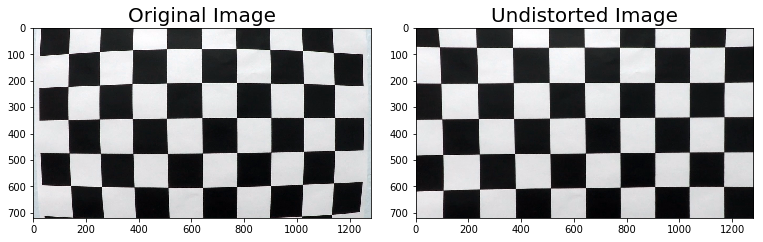

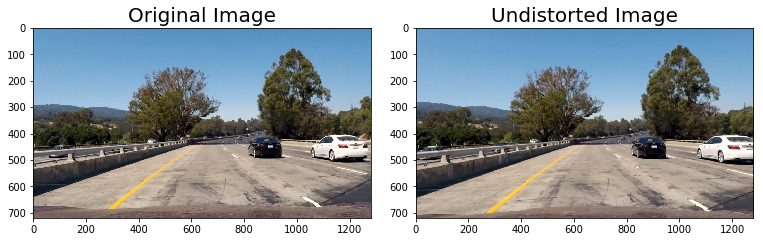

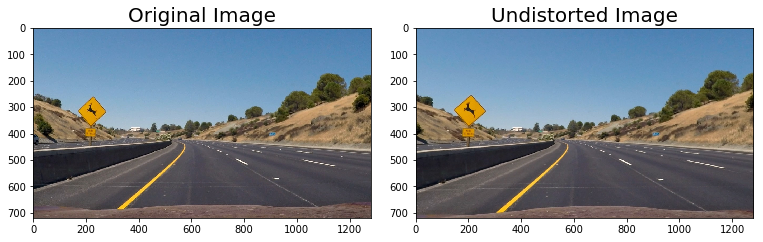

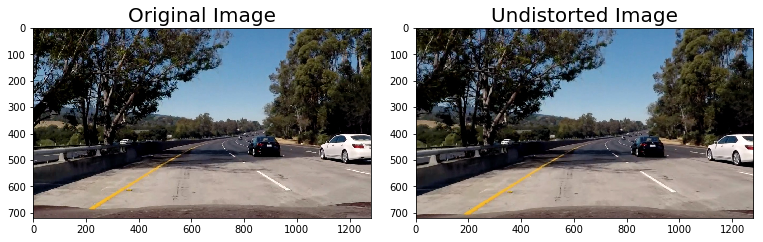

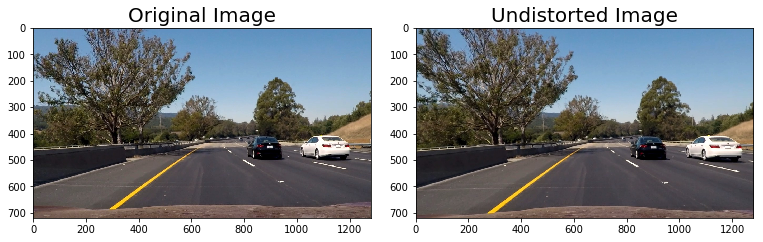

In [26]:
illustrating=[]
add_sample_image_and_its_undistort_to_list(test_image0,camera_calib_mat,camera_dist_coeff)
add_sample_image_and_its_undistort_to_list(test_image1,camera_calib_mat,camera_dist_coeff)
add_sample_image_and_its_undistort_to_list(test_image2,camera_calib_mat,camera_dist_coeff)
add_sample_image_and_its_undistort_to_list(test_image5,camera_calib_mat,camera_dist_coeff)
add_sample_image_and_its_undistort_to_list(test_image6,camera_calib_mat,camera_dist_coeff)
plot_images(illustrating)

## Use color transforms, gradients, etc., to create a thresholded binary image.

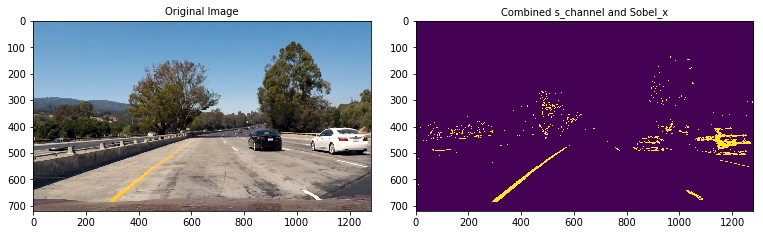

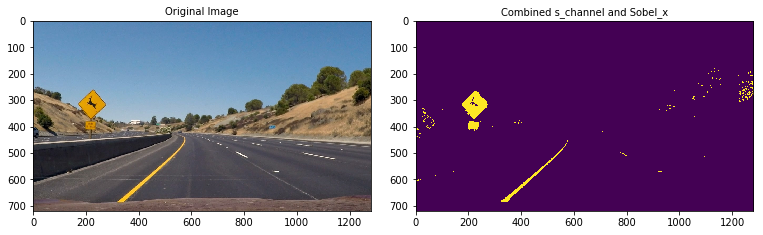

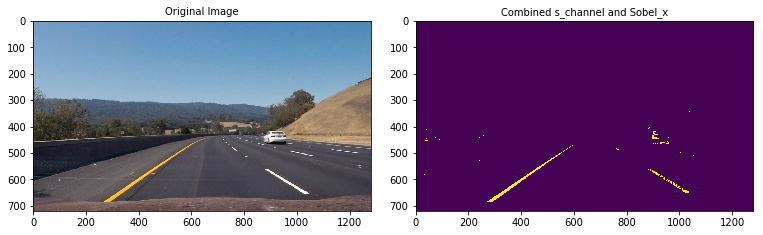

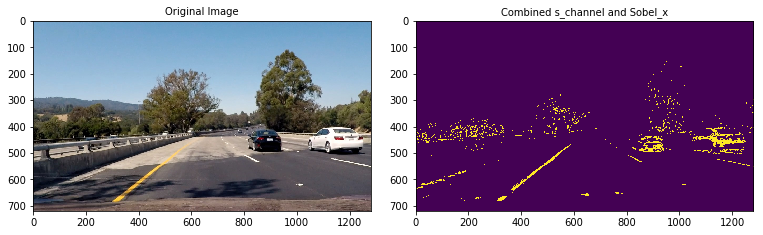

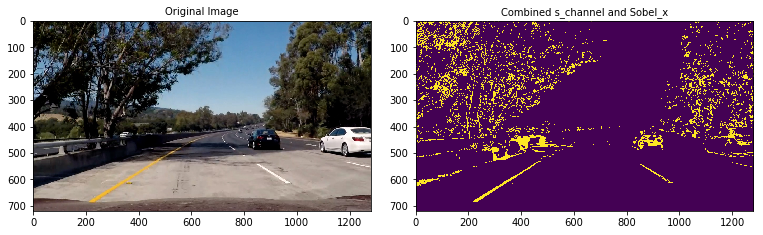

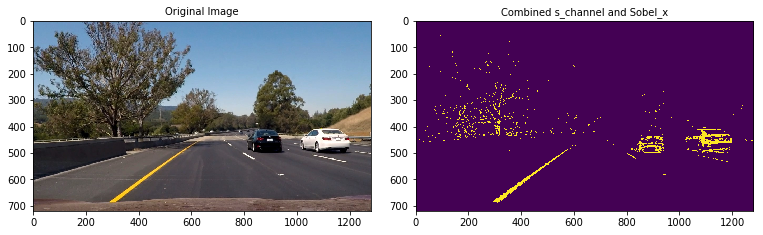

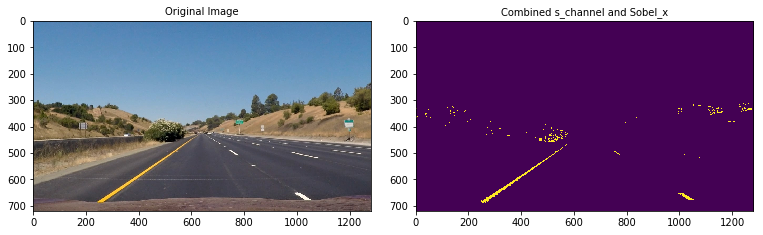

In [30]:
def mask_threshhold(image, thresh=(0, 255)):

	binary=np.zeros_like(image)
	binary[((binary>=thresh[0]) & (binary<=thresh[1]))]=1 
	return binary
def absolut_gradient(image, orient='x', sobel_kernel=3, thresh=(0, 255)):
	# Calculate directional gradient
	# Apply threshold
	x=0
	y=0
	if orient=='x':
		x=1
	if orient=='y':
		y=1
	sobeled=cv2.Sobel(image,cv2.CV_64F, x, y, ksize=sobel_kernel)
	sobeled=np.absolute(sobeled)
	sobeled = np.uint8(255*sobeled/np.max(sobeled))
	grad_binary=mask_threshhold(sobeled,thresh=thresh)
	return grad_binary

def gradient_magnitude_thresh(image, sobel_kernel=3,thresh=(0, 255)):
	sobelx = absolut_gradient(image, orient='x', sobel_kernel=3,thresh=thresh)
	sobely = absolut_gradient(image, orient='y', sobel_kernel=3,thresh=thresh)
	gradmag = np.sqrt(sobelx**2 + sobely**2)
	gradmag = np.uint8(255*gradmag/np.max(gradmag))
	mag_binary=mask_threshhold(gradmag,thresh=thresh)
	return mag_binary

def gradient_dirction_thresh(image, sobel_kernel=3,thresh=(0, np.pi/2)):
	sobelx = absolut_gradient(image, orient='x', sobel_kernel=3,thresh=thresh)
	sobely = absolut_gradient(image, orient='y', sobel_kernel=3,thresh=thresh)
	absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
	absgraddir = np.uint8(255*absgraddir/np.max(absgraddir))
	dir_binary=mask_threshhold(absgraddir,thresh=thresh)
	return dir_binary

def combine_sChannel_and_Sobelx(image, s_thresh=(170, 255), sx_thresh=(20, 100)):
    #img = np.copy(img)
   
    gray = cv2.cvtColor(np.copy(image), cv2.COLOR_RGB2GRAY).astype(np.float)
    # Sobel x
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    # Threshold gradient on Sobel x
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    # Convert to HLS color space and separate the V channel
    hls = cv2.cvtColor(np.copy(image), cv2.COLOR_RGB2HLS).astype(np.float)
    s_channel = hls[:,:,2]
    s_channel = np.uint8(255*s_channel/np.max(s_channel))
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    
    combined_binary = np.zeros_like(sxbinary)
    combined_binary[(sxbinary == 1) | (s_binary == 1)] = 1
    return combined_binary

def make_binary(image):
	ksize = 13 
	hls=cv2.cvtColor(image,cv2.COLOR_RGB2HLS)
	s=hls[:,:,2]
	s_binary=np.zeros_like(s)
	s_binary[((s>=170) & (s<=255))]=1 
	gradx = absolut_gradient(s, orient='x', sobel_kernel=ksize, thresh=(20, 100))
	grady = absolut_gradient(s, orient='y', sobel_kernel=ksize, thresh=(20, 100))
	mag_binary = gradient_magnitude_thresh(s, sobel_kernel=ksize,thresh=(20, 100))
	dir_binary = gradient_dirction_thresh(s, sobel_kernel=ksize, thresh=(0.7, 1.3))
	combined = np.zeros_like(dir_binary)
	combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1
	sChannel_stack=np.dstack((np.zeros_like(s), combined, s_binary))
	sChannel_and_Sobelx=np.zeros_like(dir_binary)
	sChannel_and_Sobelx[(combined==1)|(s_binary==1)]=1
	return sChannel_stack , sChannel_and_Sobelx
def make_binary2(image):
	ksize = 13 
	hls=cv2.cvtColor(image,cv2.COLOR_RGB2HLS)
	gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
	s=hls[:,:,2]
	s_binary=np.zeros_like(s)
	s_binary[((s>=170) & (s<=255))]=1 
	gradx = absolut_gradient(gray, orient='x', sobel_kernel=ksize, thresh=(20, 100))
	combined = np.zeros_like(gradx)
	combined[(gradx == 1) | (s_binary == 1)] = 1

	return combined 
# draw the images
#gray=cv2.cvtColor(test_images,cv2.COLOR_RGB2GRAY)test_images
#gradx = absolut_gradient(gray, orient='x', sobel_kernel=ksize, thresh=(20, 100))

for i in range (1,8):
    #color_result,combine_result=make_binary(test_images[i])
    #combine_result= combine_sChannel_and_Sobelx(test_images[i])
    combine_binary=make_binary2(test_images[i])
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    f.tight_layout()
    ax1.imshow(test_images[i])
    ax1.set_title('Original Image', fontsize=10)
    ax2.imshow(combine_binary)
    ax2.set_title('Combined s_channel and Sobel_x', fontsize=10)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


## Apply a perspective transform to rectify binary image ("birds-eye view").

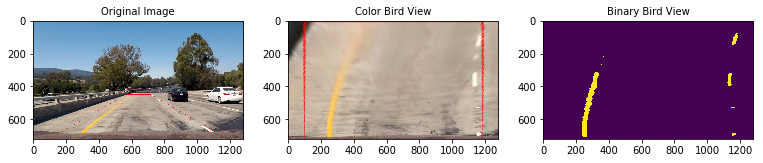

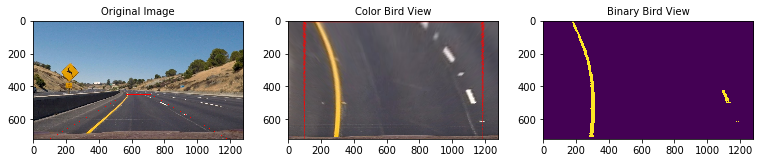

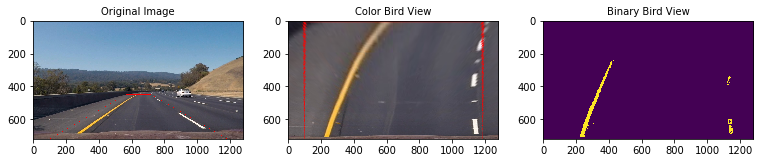

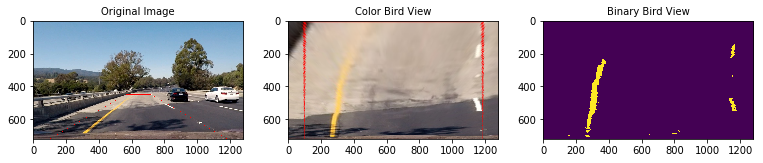

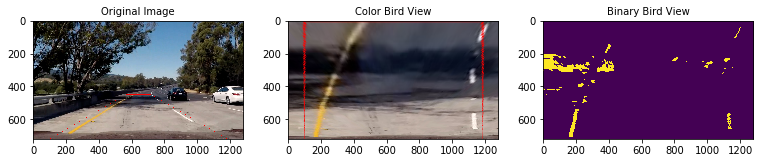

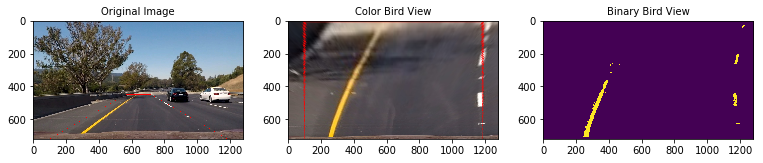

In [4]:



def bird_view(binary):
    height = binary.shape[0]
    width = binary.shape[1]
    src = np.float32([[width // 2 - 76, height * 0.625], [width // 2 + 76, height * 0.625], 
                      [100, height], [width-100, height]])
    dst = np.float32([[100, 0], [width - 100, 0], [100, height], [width - 100, height]])  
    M=cv2.getPerspectiveTransform(src,dst) 
    warped=cv2.warpPerspective(binary, M, (binary.shape[1],binary.shape[0]), flags=cv2.INTER_LINEAR)
    Minv=cv2.getPerspectiveTransform(dst,src) # this is inverse prespective matrix
    return (warped ,Minv)




i=0
for img in glob.glob('test_images/test*.jpg'):
    color_image=mpimg.imread(img)
    height = color_image.shape[0]
    width = color_image.shape[1]
    #draw red polygon on the photo
    pts = np.array([[width // 2 - 76, height * 0.625], [width // 2 + 76, height * 0.625],  [width -100, height],[100, height]])
    pts = pts.reshape((-1,1,2))
    color_image_with_red_region = cv2.polylines(np.copy(color_image),np.int32([pts]),True,(255,0,0))
    #image = mpimg.imread(test_images[i])
    color_warped_with_red_region , _ = bird_view(color_image_with_red_region) 
    combine_binary=make_binary2(test_images[i+1])
    i=i+1
    binary_warped, _ = bird_view(combine_binary)
    
    f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10, 4))
    f.tight_layout()
    ax1.imshow(color_image_with_red_region)
    ax1.set_title('Original Image', fontsize=10)
    ax2.imshow(color_warped_with_red_region)
    ax2.set_title('Color Bird View', fontsize=10)
    ax3.imshow(binary_warped)
    ax3.set_title('Binary Bird View', fontsize=10)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


## Detect lane pixels and fit to find the lane boundary.

Using histogram to estimate lanes

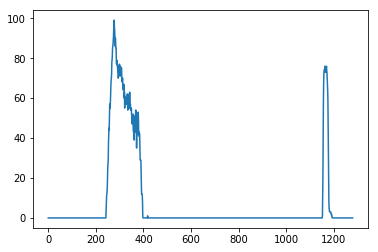

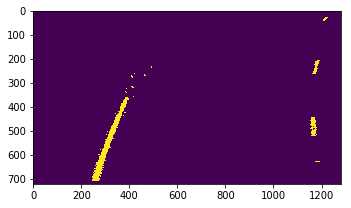

In [5]:
import numpy as np
histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
plt.plot(histogram)
f, (ax1) = plt.subplots(1,1, figsize=(5, 4))
f.tight_layout()
ax1.imshow(binary_warped)


Left line coef: f_left(y)= 0.00016 y^2 + -0.35 y + 436.20
Right line coef:f_rigtht(y)= 0.00047 y^2 + -0.34 y + 1197.48


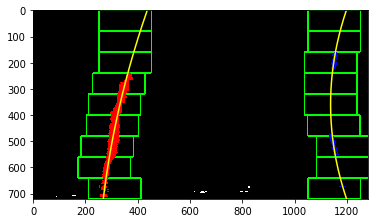

In [74]:

histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
plt.imshow(out_img)
# These will be the starting point for the left and right lines
midpoint = np.int(histogram.shape[0]//2)
leftx_base = np.argmax(histogram[:midpoint])
rightx_base = np.argmax(histogram[midpoint:]) + midpoint

# Choose the number of sliding windows
nwindows = 9
# Set height of windows
window_height = np.int(binary_warped.shape[0]//nwindows)
# Identify the x and y positions of all nonzero pixels in the image
nonzero = binary_warped.nonzero() #in this case 11643 non zero pixel are in the photo

nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])

# Current positions to be updated for each window
leftx_current = leftx_base
rightx_current = rightx_base
# Set the width of the windows +/- margin
margin = 100
# Set minimum number of pixels found to recenter window
minpix = 50
# Create empty lists to receive left and right lane pixel indices
left_lane_inds = []
right_lane_inds = []

# Step through the windows one by one
for window in range(nwindows):
    # Identify window boundaries in x and y (and right and left)
    win_y_low = binary_warped.shape[0] - (window+1)*window_height
    win_y_high = binary_warped.shape[0] - window*window_height
    win_xleft_low = leftx_current - margin
    win_xleft_high = leftx_current + margin
    win_xright_low = rightx_current - margin
    win_xright_high = rightx_current + margin
    # Draw the windows on the visualization image
    cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),
    (0,255,0), 3) 
    cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),
    (0,255,0), 3) 
    # Identify the nonzero pixels in x and y within the window
    good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
    (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
    good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
    (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
    # Append these indices to the lists
    left_lane_inds.append(good_left_inds)
    right_lane_inds.append(good_right_inds)
    # If you found > minpix pixels, recenter next window on their mean position
    if len(good_left_inds) > minpix:
        leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
    if len(good_right_inds) > minpix:        
        rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

# Concatenate the arrays of indices

left_lane_inds = np.concatenate(left_lane_inds)
right_lane_inds = np.concatenate(right_lane_inds)

# Extract left and right line pixel positions
leftx = nonzerox[left_lane_inds]
lefty = nonzeroy[left_lane_inds] 
rightx = nonzerox[right_lane_inds]
righty = nonzeroy[right_lane_inds] 
#print(len(rightx))
#print(len(leftx))

# Fit a second order polynomial to each
left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)


# Generate x and y values for plotting
ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
plt.imshow(out_img)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)
print("Left line coef: f_left(y)= %.5f y^2 + %.2f y + %.2f"% (left_fit[0],left_fit[1],left_fit[2]) )
print("Right line coef:f_rigtht(y)= %.5f y^2 + %.2f y + %.2f"%(right_fit[0],right_fit[1],right_fit[2]) )


(720, 0)

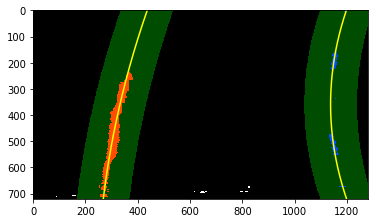

In [75]:
# Create an image to draw on and an image to show the selection window
out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
window_img = np.zeros_like(out_img)
# Color in left and right line pixels
out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

# Generate a polygon to illustrate the search window area
# And recast the x and y points into usable format for cv2.fillPoly()
left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, 
                              ploty])))])
left_line_pts = np.hstack((left_line_window1, left_line_window2))
right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, 
                              ploty])))])
right_line_pts = np.hstack((right_line_window1, right_line_window2))

# Draw the lane onto the warped blank image
cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))

result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
plt.imshow(result)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)

In [76]:
def obtain_line_points_from_image(binary_warped,polygan_img,nwindows=9,margin = 100,minpix = 50):
    binary_warped_copy=np.copy(binary_warped)
    histogram = np.sum(binary_warped_copy[binary_warped_copy.shape[0]//2:,:], axis=0)
    midpoint = np.int(histogram.shape[0]//2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint
    # Choose the number of sliding windows
    nwindows = 9
    # Set height of windows
    window_height = np.int(binary_warped_copy.shape[0]//nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped_copy.nonzero() #in this case 11643 non zero pixel are in the photo
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    nonzero_polygan = polygan_img.nonzero() #in this case 11643 non zero pixel are in the photo
    nonzeroy_polygan = np.array(nonzero[0])
    nonzerox_polygan = np.array(nonzero[1])
    
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []
    rectangle_img = np.zeros_like( np.dstack((binary_warped_copy, binary_warped_copy, binary_warped_copy))*255)
    #binary_warped_with_rectangle = np.dstack((binary_warped, binary_warped, binary_warped))*255
    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # Draw the windows on the visualization image
        cv2.rectangle(rectangle_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),
        (0,255,0), 3) 
        cv2.rectangle(rectangle_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),
        (0,255,0), 3) 
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = (((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)) &
         ((nonzeroy_polygan >= win_y_low) & (nonzeroy_polygan < win_y_high) & 
        (nonzerox_polygan >= win_xleft_low) & (nonzerox_polygan < win_xleft_high))).nonzero()[0]
        good_right_inds = (((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)) &
         ((nonzeroy_polygan >= win_y_low) & (nonzeroy_polygan < win_y_high) & 
        (nonzerox_polygan >= win_xright_low) & (nonzerox_polygan < win_xright_high))).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)
    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 
    return rectangle_img, lefty, leftx, righty, rightx

def fit_lines(binary_warped,lefty, leftx, righty, rightx): 
    binary_warped_copy=np.copy(binary_warped)
    # Fit a second order polynomial to each
    left_fit_coef = np.polyfit(lefty, leftx, 2)
    right_fit_coef = np.polyfit(righty, rightx, 2)
    # Generate x and y values for plotting
    fit_line_img = np.zeros_like( np.dstack((binary_warped_copy, binary_warped_copy, binary_warped_copy))*255)
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit_coef[0]*ploty**2 + left_fit_coef[1]*ploty + left_fit_coef[2]
    right_fitx = right_fit_coef[0]*ploty**2 + right_fit_coef[1]*ploty + right_fit_coef[2]
    #out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    #out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
    #plt.plot(left_fitx, ploty, color='yellow')
    #plt.plot(right_fitx, ploty, color='yellow')
    #plt.xlim(0, fit_line_img.shape[1])
    #plt.ylim(fit_line_img.shape[0], 0)
    return left_fitx,right_fitx, left_fit_coef,right_fit_coef

def create_polygon(binary_warped,left_fitx, right_fitx,margin = 100): 
    binary_warped_copy=np.copy(binary_warped)
    window_img = np.zeros_like( np.dstack((binary_warped_copy, binary_warped_copy, binary_warped_copy))*255)
    ploty = np.linspace(0, binary_warped_copy.shape[0]-1, binary_warped_copy.shape[0] )
    # Generate a polygon to illustrate the search window area
    # And recast the x and y points into usable format for cv2.fillPoly()
    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin,ploty])))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin,ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,150, 0))
    cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,150, 0))
   # result = cv2.addWeighted(binary_warped, 1, window_img, 0.3, 0)
   # plt.imshow(result)
    #plt.imshow(window_img)
   # plt.plot(left_fitx, ploty, color='yellow')
   # plt.plot(right_fitx, ploty, color='yellow')
   # plt.xlim(0, binary_warped_copy.shape[1])
   # plt.ylim(binary_warped_copy.shape[0], 0)
    return window_img
def create_lines(binary_warped,left_coef,right_coef):
    y = np.linspace(0, binary_warped.shape[0] - 1, binary_warped.shape[0])
    left_lane=np.stack((left_coef[0] * y ** 2 + left_coef[1] * y + left_coef[2], y)).astype(np.int).T
    rigth_lane=np.stack((right_coef[0] * y ** 2 + right_coef[1] * y + right_coef[2], y)).astype(np.int).T
    binary_warped_ch3 = np.dstack((binary_warped, binary_warped, binary_warped))*255
    overlay = np.zeros_like(binary_warped_ch3).astype(np.uint8)
    points = np.vstack(left_lane)
    cv2.polylines(overlay, [points], False,(255, 255, 0),thickness=7)
    points = np.vstack(rigth_lane)
    cv2.polylines(overlay, [points], False,(255, 255, 0),thickness=7)
    return overlay
  


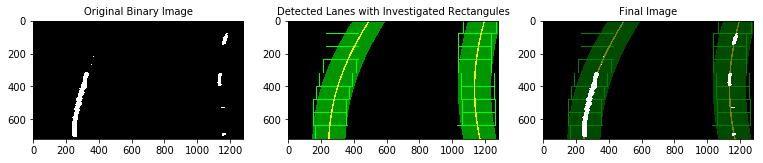

In [90]:

i=0
for img in glob.glob('test_images/test2.jpg'):
    color_image=mpimg.imread(img)
    height = color_image.shape[0]
    width = color_image.shape[1]
    #draw red polygon on the photo
    pts = np.array([[width // 2 - 76, height * 0.625], [width // 2 + 76, height * 0.625],  [width -100, height],[100, height]])
    pts = pts.reshape((-1,1,2))
    color_image_with_red_region = cv2.polylines(np.copy(color_image),np.int32([pts]),True,(255,0,0))
    #image = mpimg.imread(test_images[i])
    color_warped_with_red_region , _ = bird_view(color_image_with_red_region) 
    combine_binary=make_binary2(test_images[i+1])
    i=i+1
    binary_warped, _ = bird_view(combine_binary)
    
    
   
    searching_polygan = np.zeros([binary_warped.shape[0],binary_warped.shape[1],3],dtype=np.uint8)
    searching_polygan.fill(255) 
    (rectangles_img, lefty_pts, leftx_pts, righty_pts, rightx_pts)= obtain_line_points_from_image(binary_warped,searching_polygan,nwindows=9,margin = 100,minpix = 50)
    (fit_left_x,fit_right_x,left_coef,right_coef)=fit_lines(binary_warped,lefty_pts, leftx_pts, righty_pts, rightx_pts)
    green_polygan_around_fit_lane_img=create_polygon(binary_warped,fit_left_x,fit_right_x,margin = 100)
    searching_polygan=green_polygan_around_fit_lane_img
    line_img=create_lines(binary_warped,left_coef,right_coef)
    binary_warped_ch3 = np.dstack((binary_warped, binary_warped, binary_warped))*255
    rectangle_curve_img=cv2.addWeighted(rectangles_img,1.,green_polygan_around_fit_lane_img,1.,0)
    rectangle_curve_lines_img=cv2.addWeighted(rectangle_curve_img,1.,line_img,1.,0)
    binary_weighted = cv2.addWeighted(binary_warped_ch3, 1., rectangle_curve_lines_img, 0.5, 0)
   # binary_rectangle_fit = cv2.addWeighted(binary_rectangle, 1, fit_cureve, 0.5, 0)
   # binary_rectangle_fit_polygan = cv2.addWeighted(binary_rectangle_fit, 1, green_polygan_around_fit_lane, 0.3, 0)
    
 
    f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10, 4))
    f.tight_layout()
    ax1.imshow(binary_warped_ch3)
    ax1.set_title('Original Binary Image', fontsize=10)
    ax2.imshow(rectangle_curve_lines_img)
    ax2.set_title('Detected Lanes with Investigated Rectangules', fontsize=10)
    ax3.imshow(binary_weighted)
    ax3.set_title('Final Image', fontsize=10)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    

    
    

## Determine the curvature of the lane and vehicle position with respect to center

In [77]:
def curvature_and_center_distance(img,left_fit,right_fit):
    # curvature formulat is 
    #(1+(2Ay+B)^2)^1.5  / abs(2A)
    # in the pixel scale, A= left_fit[0] and B=left_fit[1]
    ploty = np.linspace(0, img.shape[0]-1, img.shape[0] )
    y_eval = np.max(ploty)
    left_curverad = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
    right_curverad= ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
    #print("Curvature in pixel scale: %.3f %.3f" % (left_curverad, right_curverad))

    ### First approach for obtaining curvature in meter (in real world scale)
    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension


    # If the parabola is x= a*(y**2) +b*y+c; and mx and my are the scale for the x and y axis, 
    # respectively (in meters/pixel); then the scaled parabola is x= mx / (my ** 2) *a*(y**2)+(mx/my)*b*y+c
    # Therefore, A= mx / (my ** 2) *a  ,  B=(mx/my)*b  , and C=c
    A_left=(xm_per_pix/(ym_per_pix**2))*(left_fit[0])
    B_left=(xm_per_pix/ym_per_pix)*(left_fit[1])
    A_right=(xm_per_pix/(ym_per_pix**2))*(right_fit[0])
    B_right=(xm_per_pix/ym_per_pix)*(right_fit[1])

    left_curverad_meter = ((1 + (2*A_left*y_eval + B_left)**2)**1.5) / np.absolute(2*A_left)
    right_curverad_meter= ((1 + (2*A_right*y_eval + B_right)**2)**1.5) / np.absolute(2*A_right)
    #print("Curvature in metric: %.3f %.3f" % (left_curverad_meter, right_curverad_meter))
    #calculate distance from center which is the image midpoint - mean of l_fit and r_fit intercepts 
    left_lane_pos = left_fit[0]*(y_eval**2) + left_fit[1]*y_eval + left_fit[2]
    right_lane_pos= right_fit[0]*(y_eval**2) + right_fit[1]*y_eval + right_fit[2]
    center_of_lanes=(left_lane_pos+right_lane_pos)/2
    car_position = img.shape[1]/2
    center_distance=(car_position-center_of_lanes)*xm_per_pix
    return left_curverad_meter, right_curverad_meter, center_distance

print(curvature_and_center_distance(color_image,left_fit=left_fit,right_fit=right_fit))


(1757.826215483625, 3941.6532717999339, -0.49347402025580384)


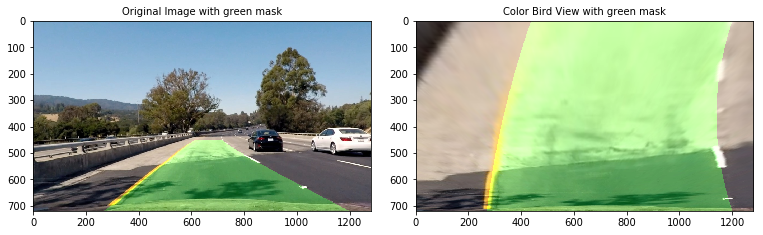

In [78]:
# apply undistort on to the last color_image
undistort_image=undistort(color_image, camera_calib_mat, camera_dist_coeff)


# Create an image to draw the lines on
warp_zero = np.zeros_like(binary_warped).astype(np.uint8)
color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

# Recast the x and y points into usable format for cv2.fillPoly()
pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
pts = np.hstack((pts_left, pts_right))

# Draw the lane onto the warped blank image
cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

(warped, Minv)=bird_view(undistort_image)

# Warp the blank back to original image space using inverse perspective matrix (Minv)
newwarp = cv2.warpPerspective(color_warp, Minv, (color_warp.shape[1], color_warp.shape[0])) 
weighted_on_real_image = cv2.addWeighted(undistort_image, 1, newwarp, 0.3, 0)
weighted_on_warped_image = cv2.addWeighted(warped, 1, color_warp, 0.3, 0)

f, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 4))
f.tight_layout()
ax1.imshow(weighted_on_real_image)
ax1.set_title('Original Image with green mask', fontsize=10)
ax2.imshow(weighted_on_warped_image)
ax2.set_title('Color Bird View with green mask', fontsize=10)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)



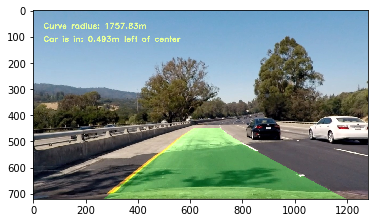

In [84]:

def write_on_image(img, curvatue, center_dist):
    copy_img = np.copy(img)
    text = 'Curve radius: ' + '{:.2f}'.format(curvatue) + 'm'
    cv2.putText(copy_img, text, (40,70),  cv2.FONT_HERSHEY_DUPLEX, 1., (230,255,155), 2, cv2.LINE_AA)
    direction = ''
    if center_dist > 0:
        direction = 'right'
    elif center_dist < 0:
        direction = 'left'
    elif center_dist == 0:
        direction = 'center'     
    text = 'Car is in: '+'{:04.3f}'.format(abs(center_dist)) + 'm ' + direction + ' of center'
    cv2.putText(copy_img, text, (40,120), cv2.FONT_HERSHEY_DUPLEX, 1., (230,255,155), 2, cv2.LINE_AA)
    return copy_img

(l_curve,r_curve,dist)=curvature_and_center_distance(color_image,left_fit=left_fit,right_fit=right_fit)

result=write_on_image(weighted_on_real_image, (l_curve+l_curve)/2, dist)
imshow(result)

## Final Pipeline

In [1]:
%matplotlib inline
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#%matplotlib qt
%pylab inline
import pickle


# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')

#main functions
#this function find the chesspoint od all images in camera_cal directort and
#populate the objpoints and imgpoints list
def find_chessboard_points_in_directory(images_directory):
    # Arrays to store object points and image points from all the images.
    tmp_objpoints = [] # 3d points in real world space
    tmp_imgpoints = [] # 2d points in image plane.
    # Step through the list and search for chessboard corners
    for fname in images_directory:
        img = cv2.imread(fname)
        gray = cv2.cvtColor(np.copy(img),cv2.COLOR_RGB2GRAY)
        # Find the chessboard corners
        ret, corners = cv2.findChessboardCorners(gray, (9,6),None)
        # If found, add object points, image points
        if ret == True:
            tmp_objpoints.append(objp)
            tmp_imgpoints.append(corners)

            # Draw and display the corners
            image = cv2.drawChessboardCorners(img, (9,6), corners, ret)
            #cv2.imshow('img',img)
            #cv2.waitKey(500)
    #print(len(tmp_objpoints))  # only in 17 photos our of 20 photos, the cv2.findChessboardCorners() could correctly find the corners
    #cv2.destroyAllWindows()
    return tmp_objpoints,tmp_imgpoints
def find_chessboard_points(image):
    # Arrays to store object points and image points from all the images.
    tmp_objpoints = [] # 3d points in real world space
    tmp_imgpoints = [] # 2d points in image plane.
    img = np.copy(image)
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)
    if ret == True:
        tmp_objpoints.append(objp)
        tmp_imgpoints.append(corners)
        image = cv2.drawChessboardCorners(img, (9,6), corners, ret)
    return tmp_objpoints,tmp_imgpoints

# This function takes an image, object points, and image points
# obtains the camera calibration
def obtain_camera_calib_matrix(image,objpoints, imgpoints):
    img = np.copy(image)
    #image_copy=cv2.cvtColor(np.copy(image),cv2.COLOR_BGR2RGB)  
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    image_size = (image.shape[1], image.shape[0])
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    return mtx, dist

# This function takes an image , camera matrix and its distortion correction coeficient and 
# returns the undistorted image
def undistort(img, camera_calib_matrix, camera_dist_coeff):
    undist = cv2.undistort(img, camera_calib_matrix, camera_dist_coeff, None, camera_calib_matrix)
    return undist


  # The next 7 functions (enhance_lines , rgb_channel_threshold , abs_sobel_thresh , mag_thresh , color_mask , color_mask2 , yellow_mask
  #are borrowed from github.com/FieryRobot
def enhance_lines(image):
    red_binary = rgb_channel_threshold(image, 'r', thresh=(200, 255))
    sobelx = abs_sobel_thresh(image, orient='x', sobel_kernel=3, thresh=(22, 124))
    sobely = abs_sobel_thresh(image, orient='y', sobel_kernel=3, thresh=(22, 124))
    sobelmag = mag_thresh(image, sobel_kernel=3, mag_thresh=(20, 200))
    mask_binary = (color_mask(image) / 255).astype(np.uint8)
    combined = np.zeros_like(red_binary)
    combined[(((red_binary == 1) | (mask_binary == 1)) &
              ((sobelx == 1) | (sobely == 1) | (sobelmag == 1)))] = 1

    yellow_binary = yellow_mask(image)
    yellow_binary = (yellow_binary // 255).astype(np.uint8)
    another_yellow = color_mask2(image, [23, 45, 184], [41, 255, 255])
    another_yellow_binary = (another_yellow // 255).astype(np.uint8)
    mask = color_mask(image)
    mask_binary = (mask // 255).astype(np.uint8)
    all_yellow = (yellow_binary == 1) | (another_yellow_binary == 1)
    everything = np.zeros_like(red_binary)
    everything[all_yellow | (mask_binary == 1) | (red_binary == 1)] = 255
    return everything

def rgb_channel_threshold(img, channel="r", thresh=(0, 255)):
    if channel == 'r':
        channel_data = img[:, :, 0]
    elif channel == 'g':
        channel_data = img[:, :, 1]
    else:
        channel_data = img[:, :, 2]
    binary = np.zeros_like(channel_data)
    binary[(channel_data >= thresh[0]) & (channel_data <= thresh[1])] = 1
    return binary

def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255)):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    if orient == 'x':
        d = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    else:
        d = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
    abs_d = np.absolute(d)
    scaled = np.uint8(255 * abs_d / np.max(abs_d))
    binary_output = np.zeros_like(scaled)
    binary_output[(scaled >= thresh[0]) & (scaled <= thresh[1])] = 1
    return binary_output

def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    mag = np.sqrt(sobelx ** 2 + sobely ** 2)
    scaled_sobel = np.uint8(255 * mag / np.max(mag))
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel >= mag_thresh[0]) & (scaled_sobel <= mag_thresh[1])] = 1
    return binary_output

def color_mask(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    boundaries = [
        ([0, 53, 100], [80, 255, 255]), 
        ([23, 45, 184], [41, 255, 255]),
        ([0, 0, 208], [178, 255, 255])  # white
    ]
    result = np.zeros((img.shape[0], img.shape[1]), dtype='uint8')
    for lower, upper in boundaries:
        lower = np.array(lower, dtype="uint8")
        upper = np.array(upper, dtype="uint8")
        # find the colors we like
        mask = cv2.inRange(hsv, lower, upper)
        # and add it to our final one
        result = cv2.bitwise_or(result, mask)
    return result

def color_mask2(img, lower, upper):
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    return cv2.inRange(hsv, np.uint8(lower), np.uint8(upper))

def yellow_mask(img):
    return cv2.inRange(img, np.array([150, 150, 0]), np.array([255, 255, 120]))


def bird_view(binary):
    height = binary.shape[0]
    width = binary.shape[1]
    src = np.float32([[width // 2 - 76, height * 0.625], [width // 2 + 76, height * 0.625], [100, height], [width-100, height]])
    dst = np.float32([[100, 0], [width - 100, 0], [100, height], [width - 100, height]])  
    M=cv2.getPerspectiveTransform(src,dst) 
    warped=cv2.warpPerspective(binary, M, (binary.shape[1],binary.shape[0]), flags=cv2.INTER_LINEAR)
    Minv=cv2.getPerspectiveTransform(dst,src) # this is inverse prespective matrix
    return (warped ,Minv)



def obtain_line_points_from_image(binary_warped,polygan_img,nwindows=9,margin = 100,minpix = 50):
    binary_warped_copy=np.copy(binary_warped)
    histogram = np.sum(binary_warped_copy[binary_warped_copy.shape[0]//2:,:], axis=0)
    midpoint = np.int(histogram.shape[0]//2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint
    # Choose the number of sliding windows
    nwindows = 9
    # Set height of windows
    window_height = np.int(binary_warped_copy.shape[0]//nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped_copy.nonzero() #in this case 11643 non zero pixel are in the photo
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    nonzero_polygan = polygan_img.nonzero() #in this case 11643 non zero pixel are in the photo
    nonzeroy_polygan = np.array(nonzero[0])
    nonzerox_polygan = np.array(nonzero[1])
    
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []
    rectangle_img = np.zeros_like( np.dstack((binary_warped_copy, binary_warped_copy, binary_warped_copy))*255)
    #binary_warped_with_rectangle = np.dstack((binary_warped, binary_warped, binary_warped))*255
    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # Draw the windows on the visualization image
        cv2.rectangle(rectangle_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),
        (0,255,0), 3) 
        cv2.rectangle(rectangle_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),
        (0,255,0), 3) 
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = (((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)) &
         ((nonzeroy_polygan >= win_y_low) & (nonzeroy_polygan < win_y_high) & 
        (nonzerox_polygan >= win_xleft_low) & (nonzerox_polygan < win_xleft_high))).nonzero()[0]
        good_right_inds = (((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)) &
         ((nonzeroy_polygan >= win_y_low) & (nonzeroy_polygan < win_y_high) & 
        (nonzerox_polygan >= win_xright_low) & (nonzerox_polygan < win_xright_high))).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)
    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 
    return rectangle_img, lefty, leftx, righty, rightx

def fit_lines(binary_warped,lefty, leftx, righty, rightx): 
    binary_warped_copy=np.copy(binary_warped)
    # Fit a second order polynomial to each
    left_fit_coef = np.polyfit(lefty, leftx, 2)
    right_fit_coef = np.polyfit(righty, rightx, 2)
    # Generate x and y values for plotting
    fit_line_img = np.zeros_like( np.dstack((binary_warped_copy, binary_warped_copy, binary_warped_copy))*255)
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit_coef[0]*ploty**2 + left_fit_coef[1]*ploty + left_fit_coef[2]
    right_fitx = right_fit_coef[0]*ploty**2 + right_fit_coef[1]*ploty + right_fit_coef[2]
    #out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    #out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
    #plt.plot(left_fitx, ploty, color='yellow')
    #plt.plot(right_fitx, ploty, color='yellow')
    #plt.xlim(0, fit_line_img.shape[1])
    #plt.ylim(fit_line_img.shape[0], 0)
    return left_fitx,right_fitx, left_fit_coef,right_fit_coef

def create_polygon(binary_warped,left_fitx, right_fitx,margin = 100): 
    binary_warped_copy=np.copy(binary_warped)
    window_img = np.zeros_like( np.dstack((binary_warped_copy, binary_warped_copy, binary_warped_copy))*255)
    ploty = np.linspace(0, binary_warped_copy.shape[0]-1, binary_warped_copy.shape[0] )
    # Generate a polygon to illustrate the search window area
    # And recast the x and y points into usable format for cv2.fillPoly()
    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin,ploty])))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin,ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,150, 0))
    cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,150, 0))
   # result = cv2.addWeighted(binary_warped, 1, window_img, 0.3, 0)
   # plt.imshow(result)
    #plt.imshow(window_img)
   # plt.plot(left_fitx, ploty, color='yellow')
   # plt.plot(right_fitx, ploty, color='yellow')
   # plt.xlim(0, binary_warped_copy.shape[1])
   # plt.ylim(binary_warped_copy.shape[0], 0)
    return window_img
def create_lines(binary_warped,left_coef,right_coef):
    y = np.linspace(0, binary_warped.shape[0] - 1, binary_warped.shape[0])
    left_lane=np.stack((left_coef[0] * y ** 2 + left_coef[1] * y + left_coef[2], y)).astype(np.int).T
    rigth_lane=np.stack((right_coef[0] * y ** 2 + right_coef[1] * y + right_coef[2], y)).astype(np.int).T
    binary_warped_ch3 = np.dstack((binary_warped, binary_warped, binary_warped))*255
    overlay = np.zeros_like(binary_warped_ch3).astype(np.uint8)
    points = np.vstack(left_lane)
    cv2.polylines(overlay, [points], False,(255, 255, 0),thickness=7)
    points = np.vstack(rigth_lane)
    cv2.polylines(overlay, [points], False,(255, 255, 0),thickness=7)
    return overlay
  
def curvature_and_center_distance(img,left_fit,right_fit):
    # curvature formulat is 
    #(1+(2Ay+B)^2)^1.5  / abs(2A)
    # in the pixel scale, A= left_fit[0] and B=left_fit[1]
    ploty = np.linspace(0, img.shape[0]-1, img.shape[0] )
    y_eval = np.max(ploty)
    left_curverad = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
    right_curverad= ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
    #print("Curvature in pixel scale: %.3f %.3f" % (left_curverad, right_curverad))

    ### First approach for obtaining curvature in meter (in real world scale)
    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension
    
   

    # If the parabola is x= a*(y**2) +b*y+c; and mx and my are the scale for the x and y axis, 
    # respectively (in meters/pixel); then the scaled parabola is x= mx / (my ** 2) *a*(y**2)+(mx/my)*b*y+c
    # Therefore, A= mx / (my ** 2) *a  ,  B=(mx/my)*b  , and C=c
    A_left=(xm_per_pix/(ym_per_pix**2))*(left_fit[0])
    B_left=(xm_per_pix/ym_per_pix)*(left_fit[1])
    A_right=(xm_per_pix/(ym_per_pix**2))*(right_fit[0])
    B_right=(xm_per_pix/ym_per_pix)*(right_fit[1])

    left_curverad_meter = ((1 + (2*A_left*y_eval + B_left)**2)**1.5) / np.absolute(2*A_left)
    right_curverad_meter= ((1 + (2*A_right*y_eval + B_right)**2)**1.5) / np.absolute(2*A_right)
    #print("Curvature in metric: %.3f %.3f" % (left_curverad_meter, right_curverad_meter))
    #calculate distance from center which is the image midpoint - mean of l_fit and r_fit intercepts 
    left_lane_pos = left_fit[0]*(y_eval**2) + left_fit[1]*y_eval + left_fit[2]
    right_lane_pos= right_fit[0]*(y_eval**2) + right_fit[1]*y_eval + right_fit[2]
    center_of_lanes=(left_lane_pos+right_lane_pos)/2
    car_position = img.shape[1]/2
    center_distance=(car_position-center_of_lanes)*xm_per_pix
    return left_curverad_meter, right_curverad_meter, center_distance

def write_on_image(img, curvatue, center_dist):
    copy_img = np.copy(img)
    text = 'Curve radius: ' + '{:.2f}'.format(curvatue) + 'm'
    cv2.putText(copy_img, text, (40,70),  cv2.FONT_HERSHEY_DUPLEX, 1., (230,255,155), 2, cv2.LINE_AA)
    direction = ''
    if center_dist > 0:
        direction = 'right'
    elif center_dist < 0:
        direction = 'left'
    elif center_dist == 0:
        direction = 'center'     
    text = 'Car is in: '+'{:04.3f}'.format(abs(center_dist)) + 'm ' + direction + ' of center'
    cv2.putText(copy_img, text, (40,120), cv2.FONT_HERSHEY_DUPLEX, 1., (230,255,155), 2, cv2.LINE_AA)
    return copy_img


def pipeline(get_image):
    #color_image=mpimg.imread(img) 
    height = get_image.shape[0]
    width = get_image.shape[1]
    searching_polygan = np.zeros([get_image.shape[0],get_image.shape[1],3],dtype=np.uint8)
    searching_polygan.fill(255) 
    undistort_image=undistort(get_image, camera_calib_mat, camera_dist_coeff)
  
    
    blur = cv2.GaussianBlur(undistort_image, (0, 0), 3)
    sharpened = cv2.addWeighted(undistort_image, 1.5, blur, -0.5, 0)
    binary_warped, _ = bird_view(sharpened)
    enhanced = enhance_lines(binary_warped)
       
    

    (rectangles_img, lefty_pts, leftx_pts, righty_pts, rightx_pts)= obtain_line_points_from_image(enhanced,searching_polygan,nwindows=9,margin = 100,minpix = 50)
    (fit_left_x,fit_right_x,left_coef,right_coef)=fit_lines(enhanced,lefty_pts, leftx_pts, righty_pts, rightx_pts)
    
    green_polygan_around_fit_lane_img=create_polygon(enhanced,fit_left_x,fit_right_x,margin = 100)
    searching_polygan=green_polygan_around_fit_lane_img
    line_img=create_lines(enhanced,left_coef,right_coef)
    enhanced_ch3 = np.dstack((enhanced, enhanced, enhanced))*255
    rectangle_curve_img=cv2.addWeighted(rectangles_img,1.,green_polygan_around_fit_lane_img,1.,0)
    rectangle_curve_lines_img=cv2.addWeighted(rectangle_curve_img,1.,line_img,1.,0)
    binary_weighted = cv2.addWeighted(enhanced_ch3, 1., rectangle_curve_lines_img, 0.5, 0)
     

    # Create an image to draw the lines on
    warp_zero = np.zeros_like(enhanced).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))
    # Recast the x and y points into usable format for cv2.fillPoly()
    ploty = np.linspace(0, enhanced.shape[0]-1, enhanced.shape[0] )
    pts_left = np.array([np.transpose(np.vstack([fit_left_x, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([fit_right_x, ploty])))])
    pts = np.hstack((pts_left, pts_right))
    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))
    (warped, Minv)=bird_view(undistort_image)
    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (color_warp.shape[1], color_warp.shape[0])) 
    weighted_on_real_image = cv2.addWeighted(undistort_image, 1, newwarp, 0.3, 0)
    weighted_on_warped_image = cv2.addWeighted(warped, 1, color_warp, 0.3, 0)
    
    (l_curve,r_curve,dist)=curvature_and_center_distance(get_image,left_fit=left_coef,right_fit=right_coef)

    result=write_on_image(weighted_on_real_image, (l_curve+l_curve)/2, dist)

    
   # final_result=cv2.addWeighted(result, 1, binary_weighted, 0.3, 0)
    return result



img='test_images/test4.jpg'
color_image=mpimg.imread(img)
objpoints,imgpoints = find_chessboard_points_in_directory(images)
camera_calib_mat,camera_dist_coeff = obtain_camera_calib_matrix(color_image, objpoints, imgpoints)


Populating the interactive namespace from numpy and matplotlib


In [2]:
from moviepy.editor import VideoFileClip

def build_augmented_video(video_path_prefix):
    output_video_name = '{}_augmented.mp4'.format(video_path_prefix)
    input_video = VideoFileClip("{}.mp4".format(video_path_prefix))
    #clip1 = input_video.subclip(0,23)
    output_video = input_video.fl_image(pipeline)
    %time output_video.write_videofile(output_video_name, audio=False)
    
build_augmented_video('project_video')

[MoviePy] >>>> Building video project_video_augmented.mp4
[MoviePy] Writing video project_video_augmented.mp4


100%|█████████████████████████████████████████████████████████████████████████████▉| 1260/1261 [07:45<00:00,  2.81it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_augmented.mp4 

Wall time: 7min 46s
